In [5]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import os

In [6]:
# hyperparameter setting
mb_size = 32
X_dim = 784
z_dim = 64
h_dim = 128
lr = 1e-3
m = 5
lam = 1e-3
gamma = 0.5
k_curr = 0

In [7]:
# Load MNIST datasets
mnist = input_data.read_data_sets('data/mnist', one_hot=True)

Extracting data/mnist/train-images-idx3-ubyte.gz
Extracting data/mnist/train-labels-idx1-ubyte.gz
Extracting data/mnist/t10k-images-idx3-ubyte.gz
Extracting data/mnist/t10k-labels-idx1-ubyte.gz


In [33]:
def plot(samples):
    fig = plt.figure(figsize=(4, 4))
    gs = gridspec.GridSpec(4, 4)
    gs.update(wspace=0.05, hspace=0.05)

    for i, sample in enumerate(samples):
        ax = plt.subplot(gs[i])
        plt.axis('off')
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.set_aspect('equal')
        plt.imshow(sample.reshape(28, 28), cmap='Greys_r')

    return fig

In [50]:
# xavier initialization
def xavier_init(size):
    in_dim = size[0]
    xavier_stddev = 1. / tf.sqrt(in_dim / 2.)
    return tf.random_normal(shape=size, stddev=xavier_stddev)

In [51]:
# Define placeholder
X = tf.placeholder(tf.float32, shape=[None, X_dim]) # MNIST RealImage = 28*28
z = tf.placeholder(tf.float32, shape=[None, z_dim]) # Noise Dimension = 64
k = tf.placeholder(tf.float32)

In [52]:
# ********* Generator-Network 
# Hidden Layer parameter - weights & biases
G_W1 = tf.Variable(xavier_init([z_dim, h_dim])) # h_dim (Hidden Node) = 128 , z_dim = noise vector
G_b1 = tf.Variable(tf.zeros(shape=[h_dim]))

# Output Layer parameter - weights & biases
G_W2 = tf.Variable(xavier_init([h_dim, X_dim]))
G_b2 = tf.Variable(tf.zeros(shape=[X_dim]))

# Generator

def G(z):
    G_h1 = tf.nn.relu(tf.matmul(z, G_W1) + G_b1)
    G_log_prob = tf.matmul(G_h1, G_W2) + G_b2
    G_prob = tf.nn.sigmoid(G_log_prob)
    return G_prob

In [53]:
# ********* Discriminator-Network 
# Hidden Layer parameter - weights & biases
D_W1 = tf.Variable(xavier_init([X_dim, h_dim]))
D_b1 = tf.Variable(tf.zeros(shape=[h_dim]))
# Output Layer parameter - weights & biases
D_W2 = tf.Variable(xavier_init([h_dim, X_dim]))
D_b2 = tf.Variable(tf.zeros(shape=[X_dim]))

# Discriminator

def D(X):
    D_h1 = tf.nn.relu(tf.matmul(X, D_W1) + D_b1)
    X_recon = tf.matmul(D_h1, D_W2) + D_b2
    return tf.reduce_mean(tf.reduce_sum((X - X_recon)**2, 1))

In [54]:
# make noise-Latent Variable의 input으로 사용할 noise를 Uniform Distribution에서 batch_size만큼 샘플링
def sample_z(m, n):
    return np.random.uniform(-1., 1., size=[m, n])  # m = Test Sample Size, n = Noise Dimension

In [55]:
# ********* Generation, Loss, Optimization and Session Init.
G_sample = G(z)

D_real = D(X)
D_fake = D(G_sample)
# Discriminator의 loss function
D_loss = D_real - k*D_fake
# Generator의 loss function
G_loss = D_fake

# Discriminator와 Generator의 Optimizer
optim_D = (tf.train.AdamOptimizer(learning_rate=lr)
            .minimize(D_loss, var_list=[D_W1, D_W2, D_b1, D_b2]))
optim_G = (tf.train.AdamOptimizer(learning_rate=lr)
            .minimize(G_loss, var_list=[G_W1, G_W2, G_b1, G_b2]))

sess = tf.Session()
sess.run(tf.global_variables_initializer())

Epoch: 0000 D loss: 22.02 G loss: 10.43
Iter-0; Convergence measure: 22.6


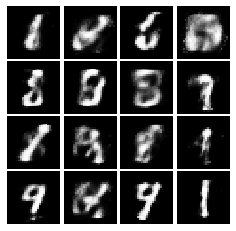

Epoch: 0001 D loss: 25.45 G loss: 12.07
Epoch: 0002 D loss: 23.23 G loss: 10.9
Epoch: 0003 D loss: 24.69 G loss: 10.12
Epoch: 0004 D loss: 25.76 G loss: 11.61
Epoch: 0005 D loss: 21.56 G loss: 10.59
Epoch: 0006 D loss: 23.13 G loss: 10.34
Epoch: 0007 D loss: 20.73 G loss: 10.73
Epoch: 0008 D loss: 22.53 G loss: 9.956
Epoch: 0009 D loss: 26.22 G loss: 8.866
Epoch: 0010 D loss: 21.82 G loss: 9.391
Iter-10; Convergence measure: 23.33


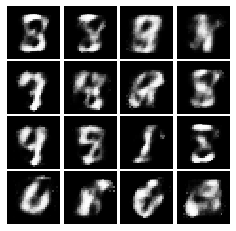

Epoch: 0011 D loss: 22.84 G loss: 10.68
Epoch: 0012 D loss: 21.07 G loss: 8.668
Epoch: 0013 D loss: 22.41 G loss: 9.586
Epoch: 0014 D loss: 22.54 G loss: 9.496
Epoch: 0015 D loss: 21.47 G loss: 9.144
Epoch: 0016 D loss: 20.39 G loss: 9.55
Epoch: 0017 D loss: 23.61 G loss: 10.53
Epoch: 0018 D loss: 21.73 G loss: 9.303
Epoch: 0019 D loss: 24.19 G loss: 10.73
Epoch: 0020 D loss: 23.85 G loss: 10.71
Iter-20; Convergence measure: 25.06


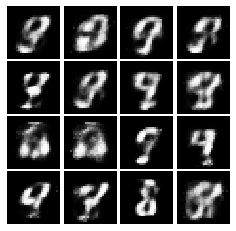

Epoch: 0021 D loss: 21.25 G loss: 11.45
Epoch: 0022 D loss: 24.14 G loss: 12.4
Epoch: 0023 D loss: 19.95 G loss: 12.35
Epoch: 0024 D loss: 23.19 G loss: 13.06
Epoch: 0025 D loss: 25.16 G loss: 12.7
Epoch: 0026 D loss: 24.75 G loss: 11.5
Epoch: 0027 D loss: 23.5 G loss: 11.34
Epoch: 0028 D loss: 22.01 G loss: 12.56
Epoch: 0029 D loss: 22.68 G loss: 11.8
Epoch: 0030 D loss: 24.18 G loss: 13.06
Iter-30; Convergence measure: 25.15


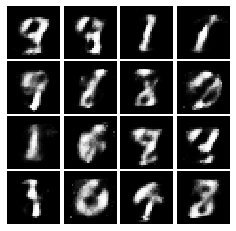

Epoch: 0031 D loss: 22.46 G loss: 12.12
Epoch: 0032 D loss: 23.62 G loss: 12.08
Epoch: 0033 D loss: 23.35 G loss: 12.76
Epoch: 0034 D loss: 23.01 G loss: 11.63
Epoch: 0035 D loss: 21.68 G loss: 12.28
Epoch: 0036 D loss: 24.5 G loss: 14.92
Epoch: 0037 D loss: 25.47 G loss: 16.15
Epoch: 0038 D loss: 28.04 G loss: 14.58
Epoch: 0039 D loss: 25.52 G loss: 15.27
Epoch: 0040 D loss: 25.51 G loss: 14.27
Iter-40; Convergence measure: 27.02


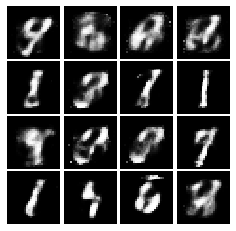

Epoch: 0041 D loss: 22.91 G loss: 14.4
Epoch: 0042 D loss: 25.52 G loss: 15.13
Epoch: 0043 D loss: 24.36 G loss: 13.85
Epoch: 0044 D loss: 25.03 G loss: 16.42
Epoch: 0045 D loss: 23.93 G loss: 14.18
Epoch: 0046 D loss: 21.11 G loss: 12.97
Epoch: 0047 D loss: 23.46 G loss: 11.25
Epoch: 0048 D loss: 25.15 G loss: 11.68
Epoch: 0049 D loss: 25.62 G loss: 11.62
Epoch: 0050 D loss: 25.67 G loss: 11.83
Iter-50; Convergence measure: 26.67


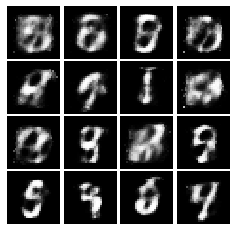

Epoch: 0051 D loss: 24.43 G loss: 10.73
Epoch: 0052 D loss: 21.93 G loss: 10.21
Epoch: 0053 D loss: 21.95 G loss: 9.926
Epoch: 0054 D loss: 23.97 G loss: 10.83
Epoch: 0055 D loss: 22.68 G loss: 11.01
Epoch: 0056 D loss: 20.83 G loss: 11.88
Epoch: 0057 D loss: 20.46 G loss: 12.2
Epoch: 0058 D loss: 23.55 G loss: 12.49
Epoch: 0059 D loss: 24.81 G loss: 11.06
Epoch: 0060 D loss: 23.59 G loss: 12.62
Iter-60; Convergence measure: 24.41


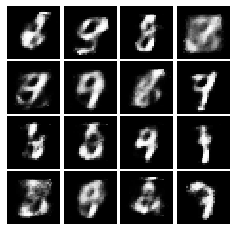

Epoch: 0061 D loss: 24.88 G loss: 12.0
Epoch: 0062 D loss: 23.22 G loss: 12.06
Epoch: 0063 D loss: 26.87 G loss: 10.33
Epoch: 0064 D loss: 23.35 G loss: 10.88
Epoch: 0065 D loss: 24.51 G loss: 10.31
Epoch: 0066 D loss: 20.46 G loss: 9.404
Epoch: 0067 D loss: 22.12 G loss: 10.38
Epoch: 0068 D loss: 24.04 G loss: 10.32
Epoch: 0069 D loss: 23.0 G loss: 11.98
Epoch: 0070 D loss: 23.43 G loss: 11.88
Iter-70; Convergence measure: 23.59


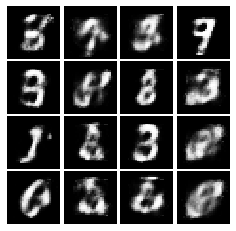

Epoch: 0071 D loss: 23.62 G loss: 12.04
Epoch: 0072 D loss: 23.83 G loss: 11.56
Epoch: 0073 D loss: 23.95 G loss: 11.51
Epoch: 0074 D loss: 23.34 G loss: 11.2
Epoch: 0075 D loss: 21.9 G loss: 11.09
Epoch: 0076 D loss: 23.15 G loss: 11.08
Epoch: 0077 D loss: 23.16 G loss: 10.77
Epoch: 0078 D loss: 24.59 G loss: 12.47
Epoch: 0079 D loss: 24.46 G loss: 11.96
Epoch: 0080 D loss: 26.05 G loss: 12.3
Iter-80; Convergence measure: 26.78


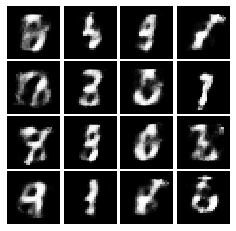

Epoch: 0081 D loss: 21.73 G loss: 13.09
Epoch: 0082 D loss: 20.82 G loss: 13.39
Epoch: 0083 D loss: 22.94 G loss: 13.32
Epoch: 0084 D loss: 24.07 G loss: 14.33
Epoch: 0085 D loss: 25.19 G loss: 14.47
Epoch: 0086 D loss: 23.3 G loss: 14.09
Epoch: 0087 D loss: 25.31 G loss: 14.23
Epoch: 0088 D loss: 23.25 G loss: 11.97
Epoch: 0089 D loss: 21.12 G loss: 11.94
Epoch: 0090 D loss: 24.35 G loss: 11.49
Iter-90; Convergence measure: 25.04


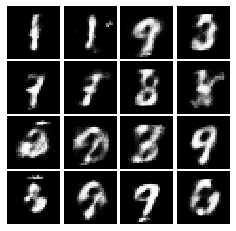

Epoch: 0091 D loss: 20.98 G loss: 12.16
Epoch: 0092 D loss: 24.52 G loss: 12.63
Epoch: 0093 D loss: 22.22 G loss: 11.8
Epoch: 0094 D loss: 23.04 G loss: 13.44
Epoch: 0095 D loss: 23.3 G loss: 12.44
Epoch: 0096 D loss: 22.98 G loss: 12.74
Epoch: 0097 D loss: 22.03 G loss: 11.31
Epoch: 0098 D loss: 24.15 G loss: 11.91
Epoch: 0099 D loss: 22.09 G loss: 11.32


In [58]:
# ********* Training and Testing

if not os.path.exists('out/'):
    os.makedirs('out/')  # make outputs folder

i = 0
num_epoch = 100

for epoch in range(num_epoch): # 10000 = Num. of Epoch
    # load MNIST images
    batch_xs, _ = mnist.train.next_batch(mb_size) # mb_size = Batch Size
    
    _, D_real_curr = sess.run(
        [optim_D, D_real],
        feed_dict={X: batch_xs, z: sample_z(mb_size, z_dim), k: k_curr}
    )

    _, D_fake_curr = sess.run(
        [optim_G, D_fake],
        feed_dict={X: batch_xs, z: sample_z(mb_size, z_dim)}
    )

    k_curr = k_curr + lam * (gamma*D_real_curr - D_fake_curr)    
    print('Epoch:', '%04d' % epoch,
          'D loss: {:.4}'.format(D_real_curr),
          'G loss: {:.4}'.format(D_fake_curr))
    if epoch % 10 == 0: # 10 = Saving period

        measure = D_real_curr + np.abs(gamma*D_real_curr - D_fake_curr)

        print('Iter-{}; Convergence measure: {:.4}'
              .format(epoch, measure))
      
        samples = sess.run(G_sample, feed_dict={z: sample_z(16, z_dim)})

        fig = plot(samples)

        plt.savefig('out/{}.png'.format(str(i).zfill(3)), bbox_inches='tight')                
        plt.show()
        i += 1
        plt.close(fig)